In [1]:
# 1) Imports
import sys
sys.path.append('/Users/notluquis/Library/Mobile Documents/com~apple~CloudDocs/Investigación/COSMIC/')

In [2]:
# --- Celda 1: imports y helpers de IO ---
import numpy as np
from COSMIC import ClusterAnalyzer
import pytensor.tensor as pt

In [3]:
# --- Celda 2: RNG y observaciones ---
rng = np.random.default_rng(42)  # semilla fija

In [4]:
file_path = "/Users/notluquis/Library/Mobile Documents/com~apple~CloudDocs/Investigación/COSMIC/COSMIC/clustering_results.dill"

ca = ClusterAnalyzer(file_path)

DataLoader initialized with file path: /Users/notluquis/Library/Mobile Documents/com~apple~CloudDocs/Investigación/COSMIC/COSMIC/clustering_results.dill
Masked data handled and replaced with NaN.


In [5]:
ca.clusters_summary(include_noise=True)

,cluster,count,fraction,persistence,mean_prob,median_prob,min_prob,max_prob,iqr_prob,centroid_pmra,centroid_pmdec,mean_dist2centroid,std_dist2centroid,pmra_range,pmdec_range
0,-1,11957,0.538240,NaN,0.000000,0.000000,0.000000,0.0,0.000000,-1.143355,-3.624370,4.625754,3.889289,65.092520,91.320198
1,0,39,0.001756,0.007670,0.990745,1.000000,0.933498,1.0,0.008619,-0.769029,-10.340236,0.408114,0.159745,1.113640,1.197941
2,1,40,0.001801,0.010913,0.990900,1.000000,0.937103,1.0,0.007917,0.114450,-6.693713,0.311966,0.137088,0.618222,0.962831
3,2,35,0.001576,0.016950,0.993068,1.000000,0.920344,1.0,0.000000,-4.152612,-6.244224,0.213020,0.122957,0.694066,0.763572
4,3,33,0.001485,0.006803,0.999119,1.000000,0.980208,1.0,0.000000,-2.517541,-0.475903,0.215459,0.092621,0.396503,0.775694
5,4,66,0.002971,0.017990,0.977739,0.964883,0.918642,1.0,0.035117,-1.407462,-5.845631,0.275323,0.086398,0.604752,0.795330
6,5,40,0.001801,0.025743,0.980952,1.000000,0.899858,1.0,0.010888,1.363101,-3.825059,0.217163,0.073988,0.417512,0.587454
7,6,31,0.001395,0.003179,0.999307,1.000000,0.988608,1.0,0.000000,-2.593448,-5.856634,0.229397,0.107535,0.708978,0.565946
8,7,33,0.001485,0.005682,0.998909,1.000000,0.981007,1.0,0.000000,1.007894,-4.530571,0.243295,0.109613,0.537902,0.783836
9,8,30,0.001350,0.007823,0.999574,1.000000,0.987214,1.0,0.000000,1.825015,0.563939,0.150388,0.069100,0.343345,0.576047


In [6]:
import asteca
isochs = asteca.Isochrones(isochs_path="/Users/notluquis/Library/Mobile Documents/com~apple~CloudDocs/Investigación/NGC6383/MIST",
                           model='MIST',
                           magnitude="Gaia_G_EDR3",
                           magnitude_effl=6390.7,
                           color=("Gaia_BP_EDR3","Gaia_RP_EDR3"),
                           color_effl = (5182.6,7825.1),
                           #color2 = ("Gaia_RP_EDR3","2MASS_J"),
                           #color2_effl = (7825.1, 12375.60),
                          )


Instantiating isochrones
Isochrone object generated


In [7]:
df = ca.data[ca.data['cluster'] == 12]

In [8]:
my_cluster = asteca.Cluster(
    ra=df["ra"],
    dec=df["dec"],
    pmra=df["pmra"],
    pmde=df["pmdec"],
    plx=df["parallax"],
    e_pmra=df["pmra_error"],
    e_pmde=df["pmdec_error"],
    e_plx=df["parallax_error"],
    magnitude=df['Gmag'],
    e_mag=df["e_Gmag"],
    color=df["G_BPmag"] - df["G_RPmag"],
    e_color=df['e_BP_RP'],
    #color2=df["G_RPmag"] - df["j_m"],
    #e_color2 = df['e_RP_J']
)


Instantiating cluster
Cluster object generated


In [9]:
synthcl = asteca.Synthetic(isochs)
synthcl.calibrate(my_cluster)


Instantiating synthetic
Synthetic clusters object generated

Calibrated observed cluster


In [10]:
# --- Celda A: precomputos (isocrona→PDF y campo) ---
import pymc as pm

from scipy.stats import gaussian_kde
from astropy.table import QTable

In [11]:
# 1) Observables (CMD + covarianzas por estrella)
c_obs = my_cluster.color
m_obs = my_cluster.magnitude
ec   = my_cluster.e_color
em   = my_cluster.e_mag
Sigma_list = np.array([[[ec[i]**2, 0.0],
                        [0.0,      em[i]**2]] for i in range(len(ec))])

In [12]:
import pytensor

In [13]:
# Rejillas (nZ,) y (nA,)
Z_grid = np.asarray(isochs.met_age_dict["met"], float)
A_grid = np.asarray(isochs.met_age_dict["loga"], float)

bp_name, rp_name = isochs.color

G_abs_list, BP_abs_list, RP_abs_list, M_list = [], [], [], []
for iz in range(len(Z_grid)):
    Gz, BPz, RPz, Mz = [], [], [], []
    for ia in range(len(A_grid)):
        fd = isochs.color_filters[iz][ia]

        # G desde theor_tracks
        Gz.append(np.asarray(isochs.theor_tracks[iz, ia, 0, :], float))

        # BP y RP desde color_filters
        BPz.append(np.asarray(fd[bp_name], float))
        RPz.append(np.asarray(fd[rp_name], float))

        # masa inicial
        Mz.append(np.asarray(isochs.theor_tracks[iz, ia, -1, :], float))

    G_abs_list.append(Gz)
    BP_abs_list.append(BPz)
    RP_abs_list.append(RPz)
    M_list.append(Mz)

G_abs_grid = np.stack(G_abs_list)    # (nZ, nA, nP)
BP_abs_grid = np.stack(BP_abs_list)  # (nZ, nA, nP)
RP_abs_grid = np.stack(RP_abs_list)  # (nZ, nA, nP)
M_grid      = np.stack(M_list)       # (nZ, nA, nP)

# Shareds para PyTensor
Zg_sh  = pytensor.shared(Z_grid, name="Zg_sh")
Ag_sh  = pytensor.shared(A_grid, name="Ag_sh")
G_sh   = pytensor.shared(G_abs_grid,  name="G_sh")
BP_sh  = pytensor.shared(BP_abs_grid, name="BP_sh")
RP_sh  = pytensor.shared(RP_abs_grid, name="RP_sh")
M_sh   = pytensor.shared(M_grid,      name="M_sh")

In [22]:
def pt_trapz(y, x=None, dx=None, axis=-1):
    if x is None:
        if dx is None:
            dx = 1.0
        d = dx
    else:
        d = pt.diff(x, axis=axis)
        # re-shape para broadcast a y
        shape = [1] * y.ndim
        shape[axis] = d.shape[axis]
        d = d.reshape(shape)
    sl1 = [slice(None)] * y.ndim
    sl2 = [slice(None)] * y.ndim
    sl1[axis] = slice(1, None)
    sl2[axis] = slice(None, -1)
    return pt.sum(d * (y[tuple(sl1)] + y[tuple(sl2)]) / 2.0, axis=axis)

def soft_pick_2d(y_grid, x_grid, x_query_2d, tau_m=0.01):
    # y_grid: (nP,), x_grid: (nP,), x_query_2d: (nP, nq)
    dx = pt.abs(x_query_2d[:, :, None] - x_grid[None, None, :])     # (nP, nq, nP)
    w  = pt.exp(-dx / tau_m)
    w  = w / pt.sum(w, axis=2, keepdims=True)                       # normaliza en la malla de masa
    return pt.sum(w * y_grid[None, None, :], axis=2)                # -> (nP, nq)
    
def soft_interp_iso(Z, loga, tau=0.02):
    dz = pt.abs(Z - Zg_sh);  wz = pt.exp(-dz / tau); wz = wz / pt.sum(wz)
    da = pt.abs(loga - Ag_sh); wa = pt.exp(-da / tau); wa = wa / pt.sum(wa)
    W = wz[:, None, None] * wa[None, :, None]
    G  = pt.sum(W * G_sh,  axis=(0,1))
    BP = pt.sum(W * BP_sh, axis=(0,1))
    RP = pt.sum(W * RP_sh, axis=(0,1))
    MM = pt.sum(W * M_sh,  axis=(0,1))
    return G, BP, RP, MM

def kroupa_phi(m):
    alpha1, alpha2 = 1.3, 2.3
    return pt.where(m < 0.5, m**(-alpha1), m**(-alpha2))

def soft_pick(y, xgrid, xquery, tau_m=0.01):
    dx = pt.abs(xquery[:, None] - xgrid[None, :])
    w  = pt.exp(-dx / tau_m)
    w  = w / pt.sum(w, axis=1, keepdims=True)
    return pt.sum(w * y[None, :], axis=1)

def cluster_nodes_from_theta_smooth(
    logt, Z, mu0, Av, f_bin, beta, *,
    qmin=0.1, nq=15, A_G_per_Av=0.79, E_BP_RP_per_Av=0.45
):
    loga = logt + 6.0
    Gabs, BPabs, RPabs, mass = soft_interp_iso(Z, loga, tau=0.02)  # (nP,)

    # singles (distancia+extinción)
    A_G  = A_G_per_Av * Av
    Ecol = E_BP_RP_per_Av * Av
    C_s  = (BPabs - RPabs) + Ecol
    M_s  = Gabs + mu0 + A_G

    # pesos IMF con Δm (vectorizado)
    phi    = kroupa_phi(mass)                           # (nP,)
    dm_mid = 0.5 * (mass[2:] - mass[:-2])
    dm0    = mass[1] - mass[0]
    dmN    = mass[-1] - mass[-2]
    dm     = pt.concatenate([dm0[None], dm_mid, dmN[None]])
    dm     = pt.clip(dm, 1e-8, np.inf)
    w_single = phi * dm                                  # (nP,)

    # malla de q y su normalización simbólica
    q   = pt.linspace(qmin, 1.0, nq)                     # (nq,)
    pq  = q**beta
    Zq  = pt_trapz(pq, x=q)
    pq  = pq / (Zq + 1e-30)                              # (nq,)

    # --- BINARIOS vectorizados ---
    mmin, mmax = mass[0], mass[-1]                       # asumimos masa ordenada
    m1 = mass[:, None]                                   # (nP,1)
    m2 = pt.clip(q[None, :] * m1, mmin, mmax)            # (nP, nq)

    # Interp. suave de magnitudes del secundario en la malla de masas
    G2  = soft_pick_2d(Gabs, mass, m2)                   # (nP, nq)
    BP2 = soft_pick_2d(BPabs, mass, m2)
    RP2 = soft_pick_2d(RPabs, mass, m2)

    # Combinar flujos (primario+secundario)
    F1G  = 10**(-0.4 * Gabs)[:, None]                    # (nP,1)
    F2G  = 10**(-0.4 * G2)                               # (nP, nq)
    Gbin = -2.5 * pt.log10(F1G + F2G)                    # (nP, nq)

    F1BP, F1RP = 10**(-0.4 * BPabs)[:, None], 10**(-0.4 * RPabs)[:, None]
    F2BP, F2RP = 10**(-0.4 * BP2),       10**(-0.4 * RP2)
    BPbin = -2.5 * pt.log10(F1BP + F2BP)
    RPbin = -2.5 * pt.log10(F1RP + F2RP)

    Cb = (BPbin - RPbin) + Ecol                           # (nP, nq)
    Mb = Gbin + mu0 + A_G                                 # (nP, nq)

    # Pesos binarios: w_single(i) * f_bin * p(q)
    Wb = w_single[:, None] * f_bin * pq[None, :]          # (nP, nq)

    # Aplanar binarios a 1D
    C_b = Cb.reshape((-1,))
    M_b = Mb.reshape((-1,))
    W_b = Wb.reshape((-1,))

    # Singles
    W_s = (1.0 - f_bin) * w_single                        # (nP,)

    # Concatenar y normalizar
    C_all = pt.concatenate([C_s, C_b])
    M_all = pt.concatenate([M_s, M_b])
    W_all = pt.concatenate([W_s, W_b])

    s = pt.sum(W_all)
    cond = (~pt.isinf(s) & ~pt.isnan(s) & (s > 0))
    W_all = pt.switch(cond,
                  W_all / s,
                  pt.fill(W_all, 1.0 / s.shape[0]))
    return C_all, M_all, W_all

In [23]:
# 2) KDE de CAMPO (empírico, fijo en Θ)
#    Usa estrellas de control/”no-miembros
mask_field = (ca.data["cluster"] != 12)
field = ca.data[mask_field]
cm_field = QTable({
    "BP_RP": field["G_BPmag"] - field["G_RPmag"],
    "Gmag":  field["Gmag"],
})
mask_finite = np.isfinite(cm_field["BP_RP"]) & np.isfinite(cm_field["Gmag"])
cm_field = cm_field[mask_finite]

In [24]:
kde_fld = gaussian_kde(
    np.vstack([cm_field["BP_RP"], cm_field["Gmag"]]),
    bw_method="scott"
)

In [25]:
import matplotlib.pyplot as plt

pad_c, pad_m = 0.2, 0.4

# Asegura array simple (Quantity o nd.array) y usa percentiles ignorando NaN
c_vals = np.asarray(c_obs)
m_vals = m_obs.value if hasattr(m_obs, "value") else np.asarray(m_obs)

cmin, cmax = np.nanpercentile(c_vals, [0.5, 99.5])
mmin, mmax = np.nanpercentile(m_vals, [0.5, 99.5])

cgrid = np.linspace(cmin - pad_c, cmax + pad_c, 250)
mgrid = np.linspace(mmin - pad_m, mmax + pad_m, 300)

C, M = np.meshgrid(cgrid, mgrid, indexing="xy")
Z_kde = kde_fld.evaluate(np.vstack([C.ravel(), M.ravel()])).reshape(C.shape)

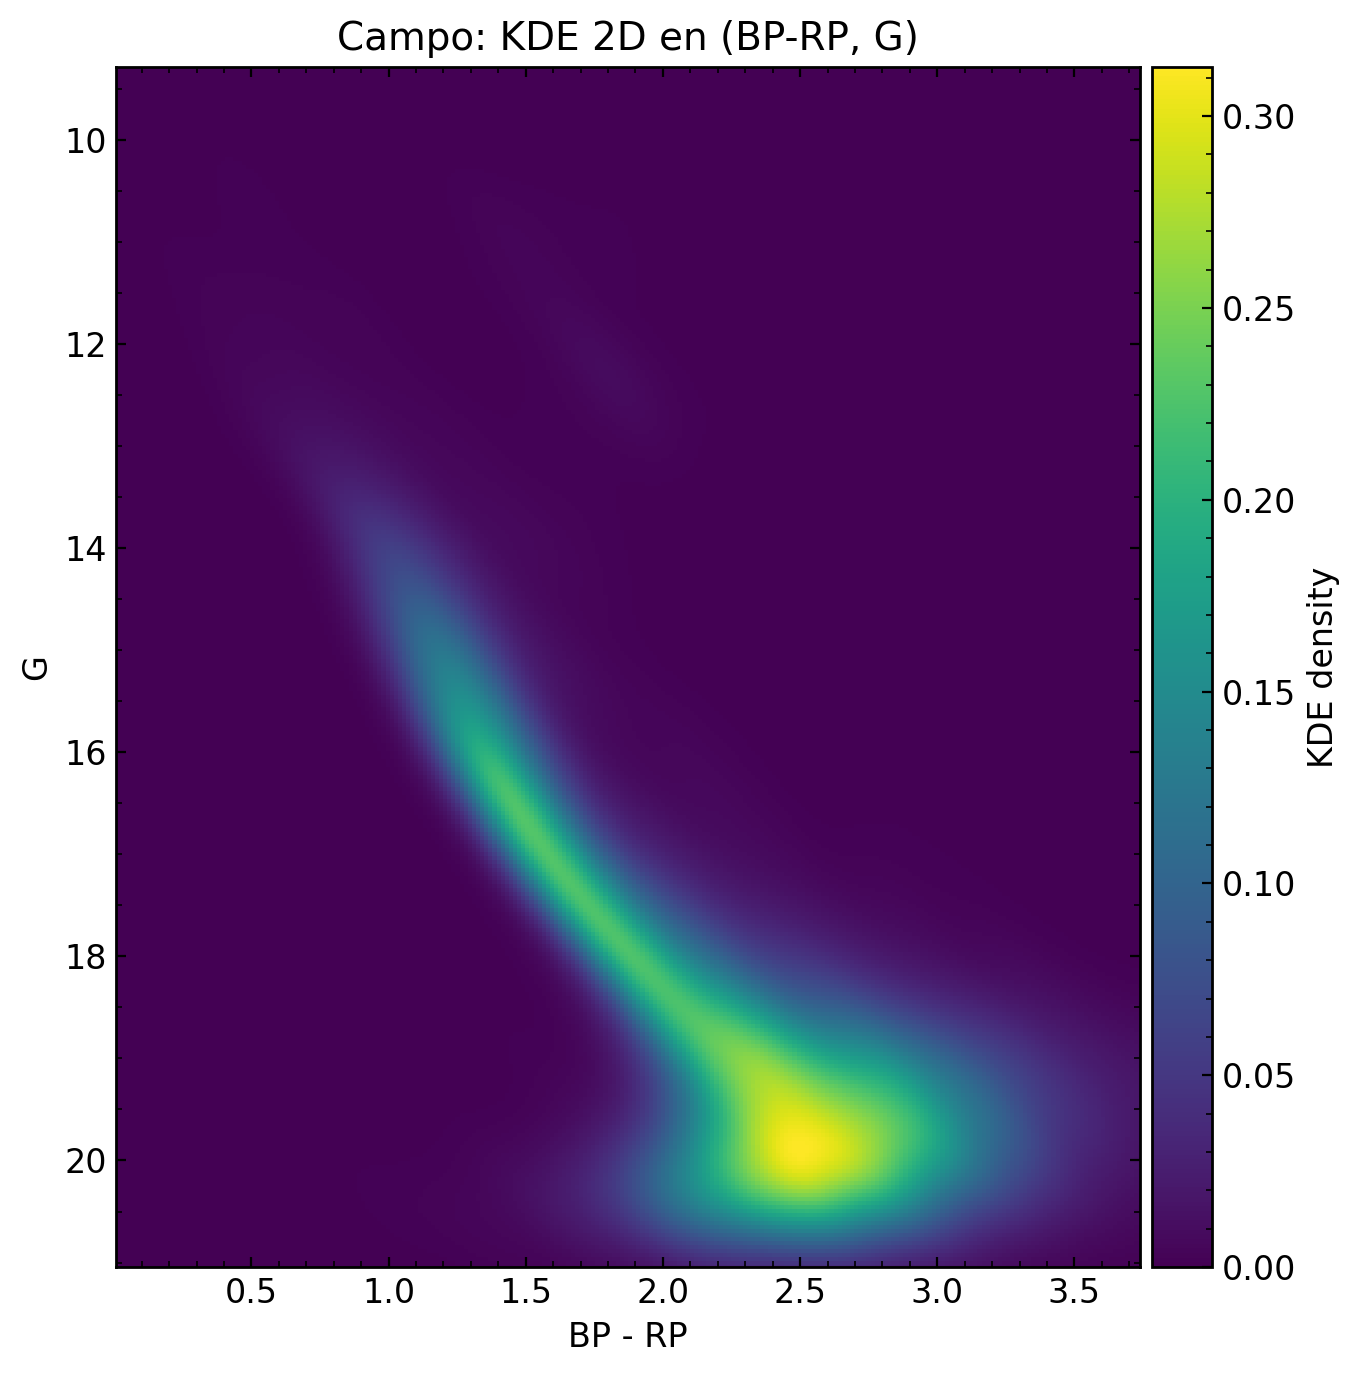

In [26]:
# 4) Plot: KDE + puntos del campo
fig, ax = plt.subplots(figsize=(7,7))

# mapa de densidad
pcm = ax.pcolormesh(C, M, Z_kde, shading="auto")
cb = fig.colorbar(pcm, ax=ax, pad=0.01)
cb.set_label("KDE density")

ax.set_xlabel("BP - RP")
ax.set_ylabel("G")
ax.set_xlim(cgrid.min(), cgrid.max())
ax.set_ylim(mgrid.max(), mgrid.min())  # invertir eje magnitud (brillantes arriba)
ax.set_title("Campo: KDE 2D en (BP-RP, G)")
plt.grid(False)
plt.tight_layout()
plt.show()

In [27]:
def p_field(c, m):
    return kde_fld.evaluate(np.vstack([c, m]))

In [28]:
# Vector de enrojecimiento (Gaia EDR3) — AJUSTAR si usas otros coeficientes
R_c = 0.45  # ~ E(BP-RP) / A_V
R_m = 0.79  # ~ A_G / A_V

In [29]:
with pm.Model() as model:
    logt   = pm.Uniform("logt",  -0.3, 1.5)
    Z      = pm.Uniform("Z", lower=5e-4, upper=0.04) # metalicidad fraccional
    mu0    = pm.Normal("mu0", mu=10.3, sigma=0.3)
    Av     = pm.HalfNormal("Av", sigma=1.5)
    sigAv  = pm.HalfNormal("sigma_Av", sigma=0.5)
    sigPMS = pm.HalfNormal("sigma_PMS", sigma=0.3)
    fbin   = pm.Beta("f_bin", alpha=1, beta=1)
    beta_q = pm.Normal("beta_q", mu=0.0, sigma=1.0)
    fcl    = pm.Beta("f_cl", alpha=3, beta=2)

    Cn, Mn, Wn = cluster_nodes_from_theta_smooth(logt, Z, mu0, Av, fbin, beta_q)

    Rc2 = (sigAv * R_c)**2
    Rm2 = (sigAv * R_m)**2
    # (dejamos cov off-diagonal físico a 0 para mantener rapidez)
    eps = 1e-12
    var_c = pt.as_tensor(Sigma_list[:,0]) + Rc2 + eps
    var_m = pt.as_tensor(Sigma_list[:,1]) + Rm2 + sigPMS**2 + eps

    dC = c_obs[:,None] - Cn[None,:]
    dM = m_obs[:,None] - Mn[None,:]
    pc   = pt.exp(-0.5 * (dC**2) / var_c[:,None]) / pt.sqrt(2*np.pi*var_c[:,None])
    pmag = pt.exp(-0.5 * (dM**2) / var_m[:,None]) / pt.sqrt(2*np.pi*var_m[:,None])
    phi_nodes = pc * pmag
    p_cl_i = pt.sum(phi_nodes * Wn[None,:], axis=1) + 1e-300

    p_fld_i = pt.as_tensor(p_field(c_obs, m_obs)) + 1e-300
    p_i = fcl * p_cl_i + (1 - fcl) * p_fld_i

    pm.Potential("ll", pt.sum(pt.log(p_i)))

TypeError: Unsupported operand type(s) for ufunc subtract: 'Quantity,TensorVariable'

In [ ]:
with model:
    trace = pm.sample(nuts_sampler='blackjax')